# \[Week2] 머신러닝 기초

## 1. 머신러닝 기본 용어 정리
[강의링크](https://edu.goorm.io/learn/lecture/4012/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%9D%B4%EB%A1%A0-%EB%B0%8F-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%8A%B5)
04.머신러닝2(오버피팅언더피팅 극복하기 ~ ) 수강하시면 됩니다.  
당연히 그냥 구글링하셔도 됩니다.  
\*각 용어 정리는 본인이 추후에 보기 편한 방법으로 자유롭게 하시면 됩니다.  
참고) 소수점 셋째자리 아래는 버림하셔도 됩니다.

### overfitting & underfitting

1. 오버피팅(overfitting)이란?  
\[답변] high variance. 노드들 간 얼마나 다른가. ex) 공통점이 too much해서 잘못 유추함. 

2. 언더피팅(underfitting)이란?  
\[답변] high bias. 정답으로부터 얼마나 멀리 있는가. ex) 공통점이 적어 잘 유추하지 못함. 

3. underfitting 막는 방법 2가지  
\[답변] feature(ex. 공통점)를 더 넣어준다, 자체적으로 variance가 높은 ml모델(decision tree, knn, svm)을 사용한다. 

4. overfitting 판단 방법  
\[답변] train data에서는 잘 작동하나 test에서는 잘 작동하지 않는다. 

5. overfitting 막는 방법  
\[답변] validation set을 사용. ex) K-Folds cross validation

### Norm  
아래 수식은 파이썬으로 작성 : x는 numpy array로 가정   
힌트) abs 함수 쓸 것

1. Norm 수식   
\[답변] np.power(np.sum(np.power(np.abs(x), p), axis = 1), 1.0 / p)

2. L1 Norm 수식    
\[답변] np.sum(np.abs(x), axis = 1)

3. L2 Norm 수식  
\[답변] np.sqrt(np.sum(np.square(x), axis = 1))

4. L2 Norm이 사용되는 Machine Learning 알고리즘   
\[답변] knn, kmean

### PCA 차원 축소

PC(Principal Component) Analysis. longest distance를 갖는 선을 긋는다.  
PC = Eigen Vector from Covariance Matrix

N dimension has N eigen vectors. 

### Confusion Matrix (혼동 행렬)  
![image](https://user-images.githubusercontent.com/45345120/94503235-f23a4680-0240-11eb-9fae-86768d58ff58.png)

1. Confusion matrix 그리기

<AxesSubplot:title={'center':'confusion matrix'}>

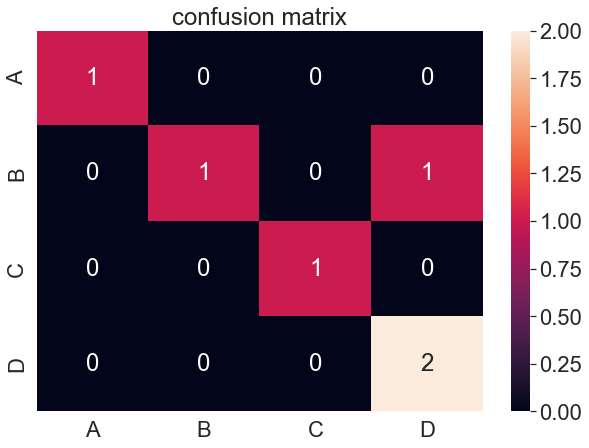

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)
array = [[1, 0, 0, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 2]]
df_cm = pd.DataFrame(array, index=["A","B","C","D"],
                        columns=["A","B","C","D"])
plt.figure(figsize=(10,7))
plt.title('confusion matrix')
sns.heatmap(df_cm, annot = True)

2. Confusion Matrix with normalization

<AxesSubplot:title={'center':'confusion matrix with normalization'}>

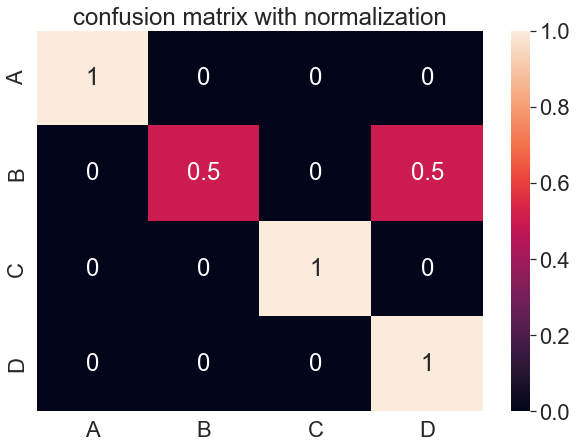

In [5]:
import numpy as np
total = np.sum(array, axis = 1)
array = array / total[:None]
df_cm = pd.DataFrame(array, index=["A","B","C","D"],
                        columns=["A","B","C","D"])
plt.figure(figsize=(10,7))
plt.title('confusion matrix with normalization')
sns.heatmap(df_cm, annot = True)

### 다중 분류 모델 성능 평가  
![image](https://user-images.githubusercontent.com/45345120/94510085-dc348200-0250-11eb-95fd-0f678b6f9e70.png)   
위의 표를 보고 모델 성능을 측정해봅시다. (소수점 셋째자리에서 반올림)

(잘함 or 못함 / 예측 긍정 or 부정) -> true positive, true negative, false positive, false negative   
actual values; input, predictions; output

0. **A의** (1)TP, (2)TN, (3)FP, (4)FN 을 각각 구하시오.  
\[(1)답] 9  
\[(2)답] 64 = 15 + 3 + 1 + 24 + 1 + 4 + 1 + 15  
\[(3)답] 6 = 1 + 5 + 0  
\[(4)답] 1 = 1 + 0 + 0 

1. Accuracy : sum of True Positive / total  
\[계산 과정]    
sum of tp = 9 + 15 + 24 + 15 = 63   
total = 80    
sum of tp / total = 63 / 80 = 0.7875   
\[답] 0.79 

2. Average Precision : tp / (tp + fp)   
\[계산 과정]    
p(A) = 9 / (9 + 6) = 9 / 15 = 3 / 5   
p(B) = 15 / (15 + 5) = 15 / 20 = 3 / 4   
p(C) = 24 / (24 + 4) = 24 / 28 = 6 / 7   
p(D) = 15 / (15 + 2) = 15 / 17   
average precision = (3 / 5 + 3 / 4 + 6 / 7 + 15 / 17) / 4 = 0.7723...   
\[답] 0.77

3. Average Recall : tp / (tp + fn)   
\[계산 과정]   
r(A) = 9 / (9 + 1) = 9 / 10   
r(B) = 15 / (15 + 5) = 15 / 20 = 3 / 4   
r(C) = 24 / (24 + 6) = 24 / 30 = 4 / 5   
r(D) = 15 / (15 + 5) = 15 / 20 = 3 / 4   
average recall = (9 / 10 + 3 / 4 + 4 / 5 + 3 / 4) / 4 = 0.8   
\[답] 0.8

4. f1 score : good at imbalaanced data. 조화평균 of precision and recall. 2 * p * r / (p + r).    
\[계산 과정] 2 * 0.772 * 0.8 / (0.772 + 0.8) = 0.7857...      
\[답] 0.79

## 2. 머신러닝 알고리즘 - 알고리즘 2개\[필수] 선택해서 작성 (다 하셔도 됩니다!)   
### 선택한 알고리즘 옆에 **❄**를 붙여주세요.  
사진을 추가해도 되고 자유 형식입니다.
[강의링크](https://edu.goorm.io/learn/lecture/4012/%2525EB%2525A8%2525B8%2525EC%25258B%2525A0%2525EB%25259F%2525AC%2525EB%25258B%25259D-%2525EC%25259D%2525B4%2525EB%2525A1%2525A0-%2525EB%2525B0%25258F-%2525ED%25258C%25258C%2525EC%25259D%2525B4%2525EC%25258D%2525AC-%2525EC%25258B%2525A4%2525EC%25258A%2525B5#) (머신러닝1, 머신러닝2-kmeans)

### 1. KNN(k-Nearest Neighbors) **❄**

1. KNN 알고리즘 정리  
\[답변] 최근접 이웃. k는 작은 홀수를 주로 사용. 최근접 거리안에 있는 노드들에 의해 결정됨. 

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1) 
# n_neighbors 가 뜻하는 것? [답변] 사용할 이웃 개수
# n_jobs 가 뜻하는 것? [답변] 이웃을 찾는데 동작하는 병렬 작업의 수. -1은 모든 프로세서를 사용한다는 뜻이다. 
knn.fit(x_train, y_train)

prediction = knn.predict(x_test)       # knn 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(knn.score(x_test, y_test)))         # x_test, y_test를 이용해 정확도 측정

results의 처음 6개 ==> ['virginica', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica']
score 메소드 이용 ==> 0.978


### 2. Decision Tree

1. Decision Tree 알고리즘 정리  
\[답변]

2. (1) Entropy (2)Information Gain 정리  
\[(1)답변]   
\[(2)답변]

3. Information Gain 구하기  
<table>
    <thead>
        <th>ID</th>
        <th>Cartoon</th>
        <th>WinterFamilyPhoto</th>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>No</td>
            <td>Yes</td>
        </tr>
        <tr>
            <td>2</td>
            <td>Yes</td>
            <td>No</td>
        </tr>
        <tr>
            <td>3</td>
            <td>Yes</td>
            <td>No</td>
        </tr>
        <tr>
            <td>4</td>
            <td>No</td>
            <td>No</td>
        </tr>
    </tbody>
</table>

(1) 위의 표 상황에서의 Entropy 구하기  
\[답변] E(WinterFamilyPhoto) =   
</br>
(2) Cartoon 기준으로 나눴을 때, Information gain 구하기  
\[답변] IG(WinterFamilyPhoto, Cartoon) = 

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = pass      # x : iris.data / y : iris.target / test_size=0.3 / random_state=0
# classifier 객체 생성
decision_tree = pass    # random_state = 0 / max_depth=2 
# max_depth 의미? [답변] 
decision_tree.pass          # x_train, y_train 이용해 트레이닝
r = pass         # export_text 함수를 이용해 decision_tree 출력
print(r)

prediction = decision_tree.pass      # decision tree 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(decision_tree.pass))          # x_test, y_test를 이용해 정확도 측정

### 3. Naive Bayes

1. 조건부 확률   
\[답변]

2. 베이즈 정리  
\[답변]

3. 확률 계산  
<table>
    <thead>
        <th>Index</th>
        <th>Email</th>
        <th>Spam</th>
    </thead>
    <tbody>
        <tr>
            <td>1</td>
            <td>I got <strong>free</strong> two movie ticket from your boy friend</td>
            <td>False</td>
        </tr>
        <tr>
            <td>2</td>
            <td><strong>free</strong> coupon from xx.com</td>
            <td><strong>True</strong></td>
        </tr>
        <tr>
            <td>3</td>
            <td>watch <strong>free</strong> new movie from freemovie.com</td>
            <td><strong>True</strong></td>
        </tr>
        <tr>
            <td>4</td>
            <td>Best deal, promo code here</td>
            <td><strong>True</strong></td>
        </tr>
        <tr>
            <td>5</td>
            <td>There will be <strong>free</strong> pizza today 2pm meeting - your boss</td>
            <td>False</td>
        </tr>
        <tr>
            <td>6</td>
            <td>Scheduled meeting tomorrow</td>
            <td>False</td>
        </tr>
        <tr>
            <td>7</td>
            <td>Can we have lunch today?</td>
            <td>False</td>
        </tr>
        <tr>
            <td>8</td>
            <td>I miss you</td>
            <td>False</td>
        </tr>
        <tr>
            <td>9</td>
            <td>thanks my friend</td>
            <td>False</td>
        </tr>
        <tr>
            <td>10</td>
            <td>It was good to see you today</td>
            <td>False</td>
        </tr>
    </tbody>
</table>

(1) Spam 메일일 확률    
\[답변] P(Spam) =


(2) 메일에 "free" 단어가 포함되어 있을 확률  
\[답변] P("free") = 

(3) 스팸 메일에 "free" 단어가 포함되어 있을 확률   
\[답변] P("free" | Spam) = 

(4) 메일에 "free" 단어가 포함되어 있을 경우 이 메일이 스팸일 확률  
\[답변] P(Spam | "free") = 

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = pass # x : iris.data / y : iris.target / test_size=0.3 / random_state=0
# classifier 객체 생성
gnb = pass
gnb.pass         # x_train, y_train 이용해 트레이닝

prediction = gnb.pass       # gnb 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(gnb.pass))        # x_test, y_test를 이용해 정확도 측정  

### 4. SVM (Support Vector Machine)

1. SVM 알고리즘 정리  
\[답변]

2. SVM 파라미터 2가지  
\[답변] 

3. Grid Search 정리  
\[답변]

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = pass      # x : iris.data / y : iris.target / test_size=0.3 / random_state=0
# classifier 객체 생성
svc = pass
svc.pass            # x_train, y_train 이용해 트레이닝

prediction = svc.pass       # svc 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(svc.pass))          # x_test, y_test를 이용해 정확도 측정

### 5. Linear Regression

1. Classification VS Regression  
\[답변] 

3. Mean Square Error 란?  
\[답변] 

4. Error = h(x) - y 일 때 Mean Square Error   
\[답변] Mean Square Error = 

5. Gradient Descent 정리  
\[답변]

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
# 이 예제에서는 sepal length를 예측해봅시다.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

# Load Iris Data
iris = load_iris()
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)        
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
# Converting Objects to Numerical dtype
iris_df = pd.concat([iris_df, target_df], axis= 1)

iris_df

In [ ]:
from sklearn.linear_model import LinearRegression
x = iris_df.pass        # 'sepal length (cm)' column drop
y = iris_df['sepal length (cm)']    
# data split
x_train, x_test, y_train, y_test = pass    # test_size=0.3 / random_state=0
# classifier 객체 생성
lr = pass
lr.pass         # x_train, y_train 이용해 트레이닝

prediction = lr.pass           # lr 이용해 x_test 예측 
print('실제 값의 처음 6개 ==> {}'.format(y_test.values[:6]))
print('results의 처음 6개 ==> {}'.format(prediction[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(lr.pass))       # x_test, y_test를 이용해 정확도 측정

### 6. Logistic Regression

1. Linear regression VS Logistic Regression  
\[답변] 

2. Sigmoid Function 정리  
\[답변]

3. Cost function?  
\[답변] 

In [ ]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# iris data 로드
iris = load_iris()
# data split
x_train, x_test, y_train, y_test = pass      # x : iris.data / y : iris.target / test_size=0.3 / random_state=0
# classifier 객체 생성
lr = pass
lr.pass             # x_train, y_train 이용해 트레이닝

prediction = lr.pass           # lr 이용해 x_test 예측
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(lr.pass))       # x_test, y_test를 이용해 정확도 측정

### 7. 랜덤 포레스트 Random Forest **❄**

1. Random Forest 알고리즘 정리  
\[답변] 여러 decision tree로 구성되어 투표로 하나를 결정한다. boosting; 중복된 데이터를 허용하여 편향이 올라간다. feature set의 랜덤 선택. 가장 좋은 질문이 선택되지 않을 수 도 있음. aggregating; 투표를 한다. 

In [5]:
# 아래 pass 부분을 지우고 내용을 채워주세요.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 0)

clf = RandomForestClassifier(max_depth = 2, random_state = 0)
# max_depth 의미? [답변] 만들어질 트리의 최대 깊이 제한 두기
clf.fit(x_train, y_train)

prediction = clf.predict(x_test)           
results = [iris.target_names[p] for p in prediction]
print('results의 처음 6개 ==> {}'.format(results[:6]))

# 정확도 계산
print('score 메소드 이용 ==> {:.3f}'.format(clf.score(x_test, y_test)))

results의 처음 6개 ==> ['virginica', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica']
score 메소드 이용 ==> 0.978


### 8. 앙상블

1. Ensemble 기법 정리  
\[답변]

2. hard voting VS soft voting  
\[답변] 

### 9. kmean 클러스터링 **❄**

1. k-mean 알고리즘 단계 - 추가 및 제거 가능  
(1) prepare data
<br>
(2) decide **how many** clusters you need
<br>
(3) choose initial center of cluster == centroid
<br>
(4) assign data point to nearest cluster
<br>
(5) move centroid to the center of its cluster
<br>
(6) repeat step 4, 5 until there is no assigned cluster change
<br>

2. clustering이 끝났다고 판단되는 경우?  
\[답변] cluster에 아무 변화가 없거나 지정한 max class assignment가 다 됨

3. 초기 centroid 결정하는 방법 3가지와 그에 대한 설명  
\[답변(1)] randomly choose : 맘대로 centroid 설정
<br>
\[답변(2)] manually assign init centroid : initial point 지정
<br>
\[답변(3)] kmean++ : 첫 data를 첫 centroid로 지정. 거기서 가장 먼 데이터가 두번째 centroid. 그 두개와 가장 먼 데이터가 그 다음 centroid. 이렇게 반복됨. 


4. KMeans 사용해보기

C:\Users\Usersilsoo\anaconda3\envs\MLStudy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(17.692947916666675, 0.5, 'y')

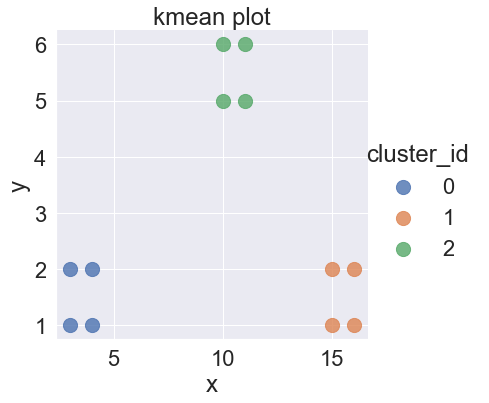

In [12]:
# 필요한 패키지 import
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Create data points
array = [[3,1], [4,1], [3,2], [4,2],
         [10,5], [10,6], [11,5], [11,6],
         [15,1], [15,2], [16,1], [16,2]]
df = pd.DataFrame(array, columns=['x', 'y'])

# convert dataframe to numpy array
data_points = df.values
kmeans = KMeans(n_clusters = 3).fit(data_points)
df['cluster_id'] = kmeans.labels_ 
# Visualize data point
sns.lmplot('x', 'y', data=df, fit_reg=False,                    
            scatter_kws={"s": 200},
            hue="cluster_id")
plt.title("kmean plot")
plt.xlabel("x")
plt.ylabel("y")
